<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

# Session-10: Simple Linear Regression



### Objective: 
 1. Implement Linear Regression from scratch.
 2. Introduce with Scikit Learn Library 
 3. Apply linear regression algorithm on a real world dataset.
 



In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Simple Linear Regression

## Dataset

In [10]:
# Download the data
# !wget -O Salary_Data.csv https://www.dropbox.com/s/qq08pgcg9vbbztr/Salary_Data.csv?dl=0
!curl -o Salary_Data.csv https://www.dropbox.com/s/qq08pgcg9vbbztr/Salary_Data.csv?dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   123    0   123    0     0    145      0 --:--:-- --:--:-- --:--:--   145


In [14]:
"""importing the dataset """

dataset = pd.read_csv('Salary_Data.csv')
dataset.head(5)
# dataset.tail(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [15]:
# independent variable  or input feature
feature = dataset[['YearsExperience']]  

# dependent variable or output
target = dataset[['Salary']] 

In [16]:
feature

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
target

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


## Splitting the Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [26]:
# X_train.values
X_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [30]:
y_train

,Salary
27,112635
11,55794
17,83088
22,101302
5,56642
16,66029
8,64445
14,61111
23,113812
20,91738


In [31]:
X_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [32]:
y_test

,Salary
2,37731
28,122391
13,57081
10,63218
26,116969
24,109431


In [33]:
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (24, 1)
Test Set Size: (6, 1)


# Implementation from scratch

**The simplest form** of the regression equation with one dependent and one independent variable.

$$h_\theta(x) = \theta_0+\theta_1x$$

where,

- $h_\theta(x)$ = estimated dependent value.
- $\theta_0$ = constant or bias.
- $\theta_1$ = regression coefficient or slope.
- $x$ = value of the independent variable.

**The cost function (or loss function)** is used to measure the performance of a machine learning model or quantifies the error between the expected values and the values predicted by our hypothetical function ($h_\theta$). The cost function for Linear Regression is represented by $J$.

$$J(\theta_0,\theta_1) = \frac{1}{2m}∑_{i=1}^m (h_\theta(x^{(i)}-y^{(i)})^2$$

- Here, $m$ is the total number of training examples in the dataset.
- $y^{(i)}$ represents the value of target variable for $i^{th}$ training example.

So, our **objective** is to **minimize the cost function** $J$ (or improve the performance of our machine learning model). To do this, we have to find the weights ($\theta_0, \theta_1$) at which $J$ is minimum.  One such algorithm which can be used to minimize any differentiable function is **Gradient Descent**. It is a first-order iterative optimizing algorithm that takes us to a minimum of a function.

# Steps to Implement Gradient Descent

**Step-1 Initializing the parameters**

Here, we need to initialize the values for our parameters. Let’s keep $\theta_0 = 0$ and $\theta_1 = 0$.

We will also need a **learning rate** to determine the step size at each iteration while moving toward a minimum value of our loss function.

**Step -2 Calculate the Partial Derivatives with respect to parameters**

Here we partially differentiate our loss function with respect to the parameters we have.


$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m}∑_{i=1}^m ((\theta_0+\theta_1x^{(i)})-y^{(i)})$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m}∑_{i=1}^m ((\theta_0+\theta_1x^{(i)})-y^{(i)}).x^{(i)}$$



**Step – 3 Updating the parameters**

Now, we update the values of our parameters using the equations given below

$$\theta_0 = \theta_0 - lr.\frac{\partial J}{\partial \theta_0} $$
$$\theta_1 = \theta_1 - lr.\frac{\partial J}{\partial \theta_1} $$

In [28]:
# Linear Regression
  
class LinearRegression() :
      
    def __init__( self, lr, iter ) :
          
        self.learning_rate = lr   
        self.iterations = iter
          
    # Function for model training           
    def fit(self, X, Y ) :
          
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
          
        # weight initialization
        self.theta_1 = np.zeros(self.n) 
        self.theta_0 = 0
        self.X = X   
        self.Y = Y
             
        # gradient descent learning
                  
        for i in range(self.iterations) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  

        dtheta_1 = (1/self.m)*sum(self.X * (Y_pred - self.Y))
        dtheta_0 = (1/self.m)*sum(Y_pred-self.Y)
      
        # dtheta_1 = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        # dtheta_0 = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.theta_1 = self.theta_1 - self.learning_rate * dtheta_1
        self.theta_0 = self.theta_0 - self.learning_rate * dtheta_0
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict(self, X) :
      
        return self.theta_1* X + self.theta_0

In [38]:
model = LinearRegression(lr = 0.01, iter = 1000 )
  
model.fit(X_train.values, y_train.values )
      
# Prediction on test set
  
y_pred = model.predict(X_test )
      
print( "Predicted values\n ", np.round( y_pred[:3], 2) )       
print( "Real values      \n", y_test[:3] )      
print( "Trained theta_1        ", round( model.theta_1[0], 2 ) )      
print( "Trained theta_0        ", round(model.theta_0[0],2) )

Predicted values
      YearsExperience
2          38249.04
28        124747.49
13         63805.40
Real values      
     Salary
2    37731
28  122391
13   57081
Trained theta_1         9829.37
Trained theta_0         23504.99


# Linear Regression using Scikit learn

In [39]:
# Fitting a simple linear regression to Training Set
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

# fit the regressor on training dataset
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
# predicting the Test set Results
y_pred = regressor.predict(X_test)
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [41]:
y_test

,Salary
2,37731
28,122391
13,57081
10,63218
26,116969
24,109431


In [42]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [43]:
y_test

,Salary
2,37731
28,122391
13,57081
10,63218
26,116969
24,109431


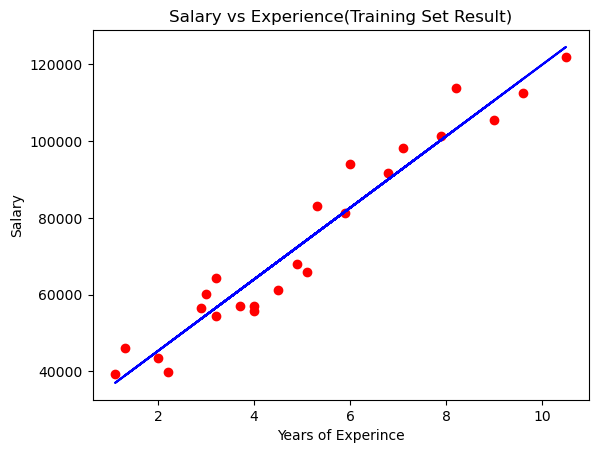

In [44]:
# Visualization the training Set Results

plt.scatter(X_train, y_train, color = 'red')
# this line is for the regressor line 
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience(Training Set Result)')
plt.xlabel('Years of Experince')
plt.ylabel('Salary')
plt.show()


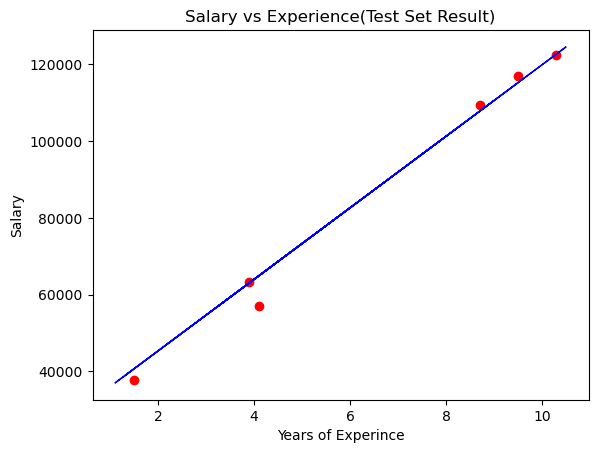

In [45]:
# Visualization the testing Set Results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue',linewidth=1)
plt.title('Salary vs Experience(Test Set Result)')
plt.xlabel('Years of Experince')
plt.ylabel('Salary')
plt.show()


## Evaluation Metrices

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. R-Squared Error

In [46]:
from sklearn.metrics import mean_absolute_error

# MAE
mean_absolute_error(y_test, y_pred)

2446.1723690465064

In [47]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

12823412.298126562


In [50]:
# def mse(y_test,y_pred):
  

In [51]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.988169515729126

In [52]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [55]:
regressor.predict([[10]])

array([[119905.85041792]])

# Reference


1.   [SuperDataScience](https://www.superdatascience.com/pages/machine-learning)

2.   [GeeksforGeeks](https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/)

